In [26]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
print(tf.__version__)

2.15.0


In [28]:
mnist = tf.keras.datasets.fashion_mnist

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [32]:
clas_name = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
             'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot' ]

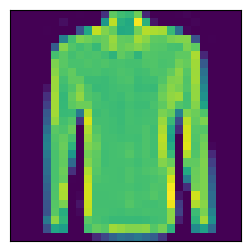

In [33]:
plt.figure(figsize=(3, 3))
plt.imshow(x_train[40])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [34]:
x_train = x_train/ 255.0
x_test = x_test/ 255.0

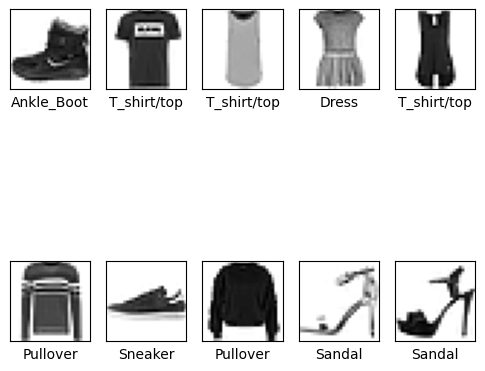

In [35]:
plt.figure(figsize = (6,6))
for i in  range (10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(clas_name[y_train[i]])

plt.show()


In [36]:
model = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28, 28)), 
                                tf.keras.layers.Dense(128, activation= 'relu'),
                                tf.keras.layers.Dense(10)
])

In [37]:
model.compile(optimizer= 'adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5464 - accuracy: 0.8101
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4674 - accuracy: 0.8381
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4652 - accuracy: 0.8404
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4604 - accuracy: 0.8413
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4673 - accuracy: 0.8406
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4735 - accuracy: 0.8393
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4794 - accuracy: 0.8382
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4875 - accuracy: 0.8399
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4900 - accuracy: 0.8374
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.493

In [40]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy is {test_accuracy}')
print(f'Test loss is {test_loss}')

313/313 - 1s - loss: 0.5799 - accuracy: 0.8235 - 969ms/epoch - 3ms/step
Test Accuracy is 0.8234999775886536
Test loss is 0.5798882842063904


In [41]:
prob = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [42]:
pred = prob.predict(x_test)
np.argmax([1])

313/313 [==============================] - 1s 1ms/step


0

In [43]:
def plot_im (i, pred_arr, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(pred_arr)
    if true_label == pred_label:
        color = 'green'
    else: 
        color = 'red'
    plt.xlabel(f'{clas_name[pred_label]} {round(100*np.max(pred_arr))}%  {clas_name[true_label]}')

def plot_value_arr(i, pred_arr, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    p = plt.bar(range(10), pred_arr)
    plt.ylim([0,1])
    pred_label = np.argmax(pred_arr)
    p[pred_label].set_color('red')
    p[true_label].set_color('green')

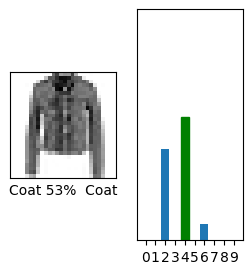

In [46]:
i = 10
plt.figure(figsize = (3, 3))
plt.subplot(1, 2, 1)
plot_im(i, pred[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_arr(i, pred[i], y_test)
plt.show()

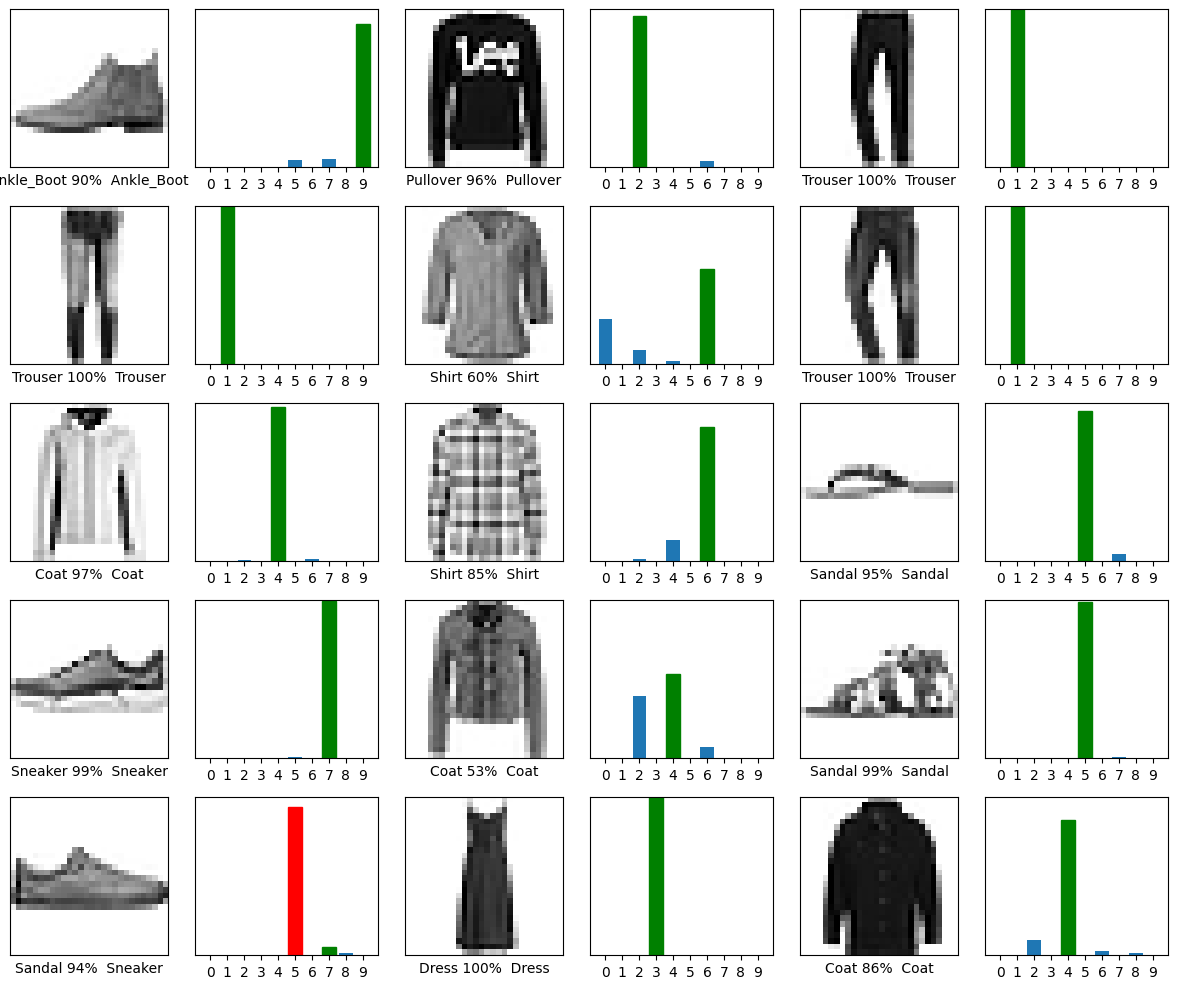

In [52]:
num_rows = 5
num_cols = 3
num_img = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_img):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_im(i, pred[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_arr(i, pred[i], y_test)
plt.tight_layout()
plt.show()